# < 4주차 과제 >
- 원하는 구조를 가진 CNN을 구축할 수 있다
- 실전적인 이미지 데이터셋을 활용하여 분류 Task를 수행해보자.

In [1]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

# Baseline (복습)

In [2]:
# Training settings

batch_size = 64

# MNIST Dataset
train_dataset = datasets.MNIST(root='./data/',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='./data/',
                              train=False,
                              transform=transforms.ToTensor())

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [3]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(1, 10, kernel_size = 5)
    self.conv2 = nn.Conv2d(10, 20, kernel_size = 5)
    self.mp = nn.MaxPool2d(2)
    self.fc = nn.Linear(320 , 10) ### : 알맞는 input은? 임의의 size로 지정 후 적절한 값 찾기

  def forward(self, x):
    in_size = x.size(0)
    x = F.relu(self.mp(self.conv1(x)))
    x = F.relu(self.mp(self.conv2(x)))
    x = x.view(in_size, -1)
    x = self.fc(x)
    return F.log_softmax(x)

In [4]:
model = Net()
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)

In [5]:
def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = Variable(data), Variable(target)
    optimizer.zero_grad()
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 10 == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
          epoch, batch_idx * len(data), len(train_loader.dataset),
          100. * batch_idx / len(train_loader), loss.item()))

In [6]:
def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        test_loss += F.nll_loss(output, target, size_average=False).data # nll_loss?? / cross entropy loss와의 관계 확인!
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [7]:
for epoch in range(1, 10):
    train(epoch)
    test()

C:\Users\candy\AppData\Local\Temp/ipykernel_6964/925576318.py:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.309124
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.282500
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.282593
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.254647
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.214400
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.187760
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.138185
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.058681
Train Epoch: 1 [5120/60000 (9%)]	Loss: 1.958869
Train Epoch: 1 [5760/60000 (10%)]	Loss: 1.880524
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.482481
Train Epoch: 1 [7040/60000 (12%)]	Loss: 1.354518
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.093381
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.981618
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.797296
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.645658
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.614810
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.514107
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.404662
Train Epoch: 1 [12160/60000 (20%)]	Loss: 0.581465
Train Epoch: 1 [12800/60000 (

C:\Users\candy\AppData\Local\Temp/ipykernel_6964/2839716421.py:6: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)
C:\Users\candy\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Average loss: 0.1736, Accuracy: 9486/10000 (95%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.337298
Train Epoch: 2 [640/60000 (1%)]	Loss: 0.150891
Train Epoch: 2 [1280/60000 (2%)]	Loss: 0.134546
Train Epoch: 2 [1920/60000 (3%)]	Loss: 0.089310
Train Epoch: 2 [2560/60000 (4%)]	Loss: 0.147739
Train Epoch: 2 [3200/60000 (5%)]	Loss: 0.167754
Train Epoch: 2 [3840/60000 (6%)]	Loss: 0.084546
Train Epoch: 2 [4480/60000 (7%)]	Loss: 0.367190
Train Epoch: 2 [5120/60000 (9%)]	Loss: 0.225352
Train Epoch: 2 [5760/60000 (10%)]	Loss: 0.123880
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.182849
Train Epoch: 2 [7040/60000 (12%)]	Loss: 0.249393
Train Epoch: 2 [7680/60000 (13%)]	Loss: 0.119422
Train Epoch: 2 [8320/60000 (14%)]	Loss: 0.315503
Train Epoch: 2 [8960/60000 (15%)]	Loss: 0.286619
Train Epoch: 2 [9600/60000 (16%)]	Loss: 0.114515
Train Epoch: 2 [10240/60000 (17%)]	Loss: 0.222767
Train Epoch: 2 [10880/60000 (18%)]	Loss: 0.413662
Train Epoch: 2 [11520/60000 (19%)]	Loss: 0.123522
Train Epoch: 2 [12

# [4주차 과제 1 : CNN structure 구현하기]
- 3주차 과제에서 맛보았던 baseline 코드를 바탕으로,
- 첨부한 이미지의 structure를 구현해주세요!

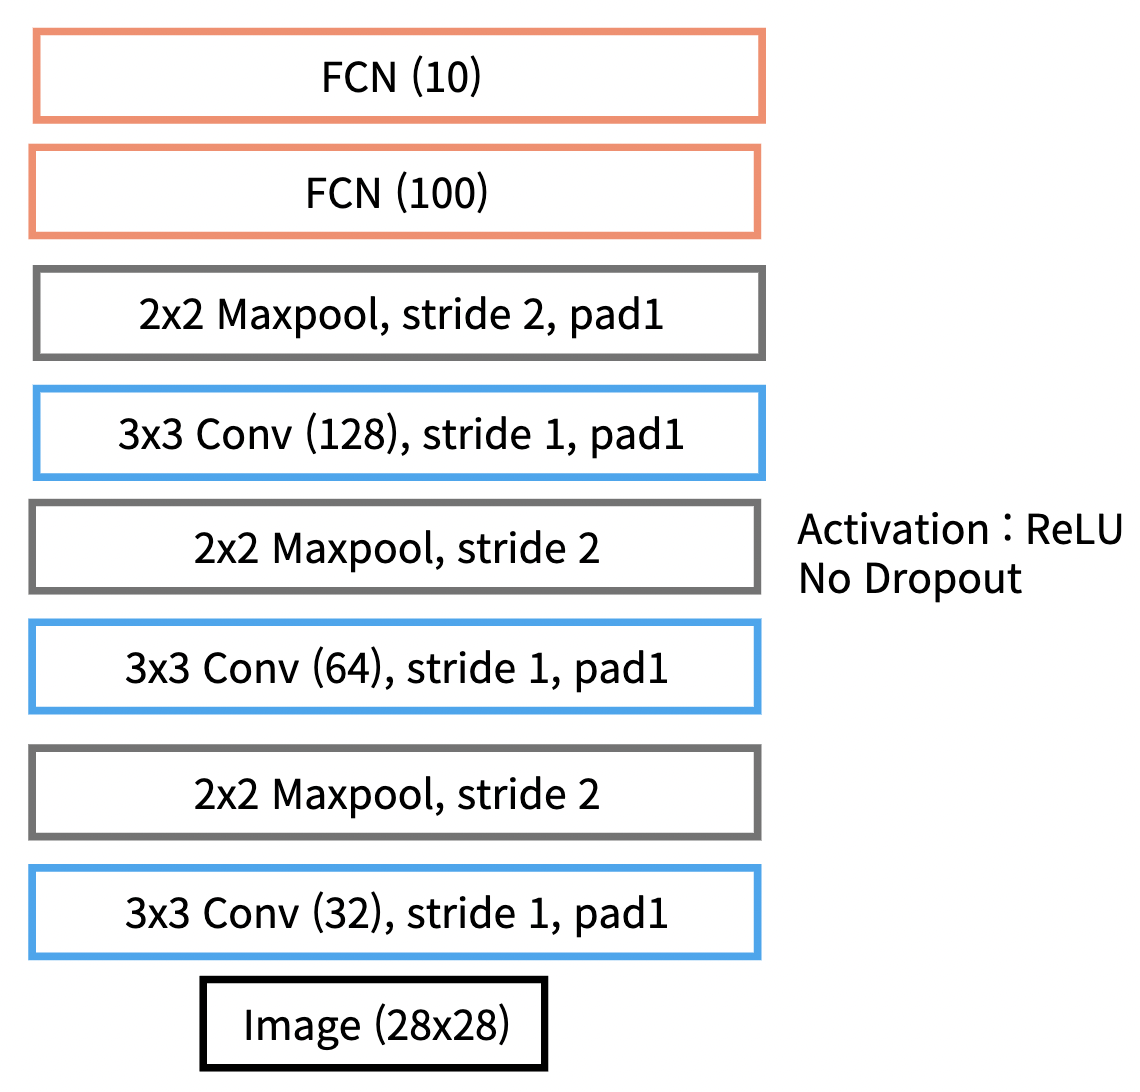

In [7]:
class revised_Net(nn.Module):
  def __init__(self):
    super(revised_Net, self).__init__()
    self.conv1 = nn.Conv2d(1,32, kernel_size = 3,padding=1,stride=1)
    self.conv2 = nn.Conv2d(32,64, kernel_size = 3,padding=1,stride=1)
    self.conv3 = nn.Conv2d(64,128, kernel_size = 3,padding=1,stride=1)
    self.mp = nn.MaxPool2d(kernel_size=2, stride=2, padding=1)
    self.fc1 = nn.Linear(3200 , 100)
    self.fc2 = nn.Linear(100 , 10)

  def forward(self, x):
    in_size = x.size(0)
    x = F.relu(self.mp(self.conv1(x)))
    x = F.relu(self.mp(self.conv2(x)))
    x = F.relu(self.mp(self.conv3(x)))
    x = x.view(in_size, -1)
    x = self.fc1(x)
    x = self.fc2(x)
    return F.log_softmax(x)

In [8]:
model = revised_Net()
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)

def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = Variable(data), Variable(target)
    optimizer.zero_grad()
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 10 == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
          epoch, batch_idx * len(data), len(train_loader.dataset),
          100. * batch_idx / len(train_loader), loss.item()))
      
def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        test_loss += F.nll_loss(output, target, size_average=False).data # nll_loss?? / cross entropy loss와의 관계 확인!
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [13]:
for epoch in range(1, 10):
    train(epoch)
    test()

C:\Users\candy\AppData\Local\Temp/ipykernel_6964/2360597777.py:19: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.300101
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.308920
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.300604
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.302281
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.298469
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.295748
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.297335
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.290074
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.289098
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.290207
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.293200
Train Epoch: 1 [7040/60000 (12%)]	Loss: 2.300916
Train Epoch: 1 [7680/60000 (13%)]	Loss: 2.280771
Train Epoch: 1 [8320/60000 (14%)]	Loss: 2.282726
Train Epoch: 1 [8960/60000 (15%)]	Loss: 2.282187
Train Epoch: 1 [9600/60000 (16%)]	Loss: 2.280843
Train Epoch: 1 [10240/60000 (17%)]	Loss: 2.279444
Train Epoch: 1 [10880/60000 (18%)]	Loss: 2.275863
Train Epoch: 1 [11520/60000 (19%)]	Loss: 2.271960
Train Epoch: 1 [12160/60000 (20%)]	Loss: 2.253062
Train Epoch: 1 [12800/60000 (

C:\Users\candy\AppData\Local\Temp/ipykernel_6964/1991067952.py:23: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)



Test set: Average loss: 0.1943, Accuracy: 9405/10000 (94%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.146417
Train Epoch: 2 [640/60000 (1%)]	Loss: 0.439140
Train Epoch: 2 [1280/60000 (2%)]	Loss: 0.268212
Train Epoch: 2 [1920/60000 (3%)]	Loss: 0.122858
Train Epoch: 2 [2560/60000 (4%)]	Loss: 0.242651
Train Epoch: 2 [3200/60000 (5%)]	Loss: 0.189524
Train Epoch: 2 [3840/60000 (6%)]	Loss: 0.167524
Train Epoch: 2 [4480/60000 (7%)]	Loss: 0.302913
Train Epoch: 2 [5120/60000 (9%)]	Loss: 0.168869
Train Epoch: 2 [5760/60000 (10%)]	Loss: 0.183982
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.370902
Train Epoch: 2 [7040/60000 (12%)]	Loss: 0.105151
Train Epoch: 2 [7680/60000 (13%)]	Loss: 0.255920
Train Epoch: 2 [8320/60000 (14%)]	Loss: 0.108943
Train Epoch: 2 [8960/60000 (15%)]	Loss: 0.128638
Train Epoch: 2 [9600/60000 (16%)]	Loss: 0.206919
Train Epoch: 2 [10240/60000 (17%)]	Loss: 0.136085
Train Epoch: 2 [10880/60000 (18%)]	Loss: 0.202487
Train Epoch: 2 [11520/60000 (19%)]	Loss: 0.228563
Train Epoch: 2 [12

# [4주차 과제 2 : CNN 활용하기]
- CIFAR 10 데이터셋을 사용하여,
- CNN을 직접 구현하며, 분류 task를 수행해봅시다.

* 지난번 과제와 마찬가지로 다양한 방식을 시도해보시고 그 시도 기록을 남겨주세요. 가장 성능이 좋았던 모델도 표시해주세요

* 이번엔 GPU resource 문제가 생길 수 있습니다. 파라미터 조정, dropout 추가 등 연산 효율성도 고려해서 베이스라인 조정해보세요

## 4주차 과제1 baseline 참조

image size를 256으로 하니 학습하는데 시간이 너무 오래 걸림(몇 시간 정도) -> gpu resource problem으로 추정
따라서 image size를 cifar dataset의 원래 사이즈로 진행함.

In [51]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

import torch
import torchvision
from torchvision import transforms, datasets

import torch.nn as nn
import torch.nn.functional as F

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#랜덤 시드 고정 : 학습을 위한 실험을 할 때 무작위성을 컨트롤하기 위해 사용한다. 
torch.manual_seed(777) #cpu 연산 고정

if device == "cuda:0":
    torch.cuda.manual_seed_all(777) # 멀티 gpu 연산 무작위 고정 

import time
import copy

from torchvision import utils
import matplotlib.pyplot as plt
import numpy as np

In [53]:
# Data Augmentation, Transform의 기능은?  RGB가 0~255 값을 가지므로 0~1사이를 갖도록 정규화함
#image size를 256으로 하니 컴퓨터 성능 문제로 학습 속도가 너무 느림. 따라서 image size를 기존의 사이즈로 진행함.
transform = transforms.Compose([
                                #transforms.Resize(256), 
                                #transforms.RandomCrop(227), #227 * 227
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  
])

In [54]:
batch_size = 64 #batch_size는 원하는 크기로 변경 가능. 

cifar_train = datasets.CIFAR10('~/.data', download=True, train=True, transform=transform)
train_loader = torch.utils.data.DataLoader(cifar_train, batch_size=batch_size, shuffle=True)                                                                                            

cifar_test = datasets.CIFAR10('~/.data', download=True, train=False, transform=transform)
test_loader = torch.utils.data.DataLoader(cifar_test, batch_size=batch_size, shuffle=True)

data_loaders = {'train' : train_loader, 'val': test_loader}
total_batch = {'train' : len(train_loader), 'val': len(test_loader)}

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


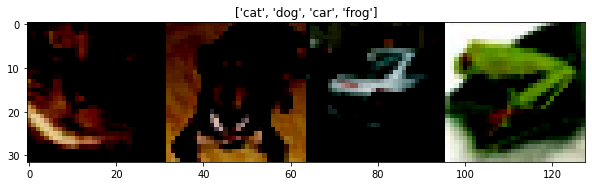

In [62]:
from torchvision import utils
import matplotlib.pyplot as plt
import numpy as np

dataiter       = iter(train_loader)   # iter함수로 iteration 객체 가져오기
images, labels = next(dataiter)   # next함수로 다음 배치 1개 갖고오기

img   = utils.make_grid(images[:4], padding=0)
npimg = img.numpy()
plt.figure(figsize=(10, 10))
plt.imshow(np.transpose(npimg, (1,2,0)))
plt.title([classes[label] for label in labels[:4].tolist()])
plt.show()

In [59]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(3, 6, kernel_size = 5)
    self.conv2 = nn.Conv2d(6, 16, kernel_size = 5)
    self.mp = nn.MaxPool2d(2)
    self.fc = nn.Linear(400, 10) ### 

  def forward(self, x):
    in_size = x.size(0)
    x = F.relu(self.mp(self.conv1(x)))
    x = F.relu(self.mp(self.conv2(x)))
    x = x.view(in_size, -1)
    x = self.fc(x)
    return F.log_softmax(x)

In [60]:
model = Net()
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)

def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = Variable(data), Variable(target)
    optimizer.zero_grad()
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 10 == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
          epoch, batch_idx * len(data), len(train_loader.dataset),
          100. * batch_idx / len(train_loader), loss.item()))
      
def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        test_loss += F.nll_loss(output, target, size_average=False).data # nll_loss?? / cross entropy loss와의 관계 확인!
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [61]:
for epoch in range(2):
    train(epoch)
    test()

C:\Users\candy\AppData\Local\Temp/ipykernel_5336/2322443776.py:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 0 [0/50000 (0%)]	Loss: 2.290169
Train Epoch: 0 [640/50000 (1%)]	Loss: 2.309349
Train Epoch: 0 [1280/50000 (3%)]	Loss: 2.282282
Train Epoch: 0 [1920/50000 (4%)]	Loss: 2.275605
Train Epoch: 0 [2560/50000 (5%)]	Loss: 2.273305
Train Epoch: 0 [3200/50000 (6%)]	Loss: 2.275091
Train Epoch: 0 [3840/50000 (8%)]	Loss: 2.305826
Train Epoch: 0 [4480/50000 (9%)]	Loss: 2.284241
Train Epoch: 0 [5120/50000 (10%)]	Loss: 2.220736
Train Epoch: 0 [5760/50000 (12%)]	Loss: 2.213229
Train Epoch: 0 [6400/50000 (13%)]	Loss: 2.230344
Train Epoch: 0 [7040/50000 (14%)]	Loss: 2.169967
Train Epoch: 0 [7680/50000 (15%)]	Loss: 2.214085
Train Epoch: 0 [8320/50000 (17%)]	Loss: 2.154158
Train Epoch: 0 [8960/50000 (18%)]	Loss: 2.112296
Train Epoch: 0 [9600/50000 (19%)]	Loss: 2.062071
Train Epoch: 0 [10240/50000 (20%)]	Loss: 1.985260
Train Epoch: 0 [10880/50000 (22%)]	Loss: 2.033821
Train Epoch: 0 [11520/50000 (23%)]	Loss: 2.016914
Train Epoch: 0 [12160/50000 (24%)]	Loss: 2.097747
Train Epoch: 0 [12800/50000 

C:\Users\candy\AppData\Local\Temp/ipykernel_5336/2347343158.py:23: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)



Test set: Average loss: 1.6011, Accuracy: 4311/10000 (43%)

Train Epoch: 1 [0/50000 (0%)]	Loss: 1.623244
Train Epoch: 1 [640/50000 (1%)]	Loss: 1.685024
Train Epoch: 1 [1280/50000 (3%)]	Loss: 1.767498
Train Epoch: 1 [1920/50000 (4%)]	Loss: 1.517500
Train Epoch: 1 [2560/50000 (5%)]	Loss: 1.710890
Train Epoch: 1 [3200/50000 (6%)]	Loss: 1.493236
Train Epoch: 1 [3840/50000 (8%)]	Loss: 1.655932
Train Epoch: 1 [4480/50000 (9%)]	Loss: 1.660403
Train Epoch: 1 [5120/50000 (10%)]	Loss: 1.331058
Train Epoch: 1 [5760/50000 (12%)]	Loss: 1.444753
Train Epoch: 1 [6400/50000 (13%)]	Loss: 1.548602
Train Epoch: 1 [7040/50000 (14%)]	Loss: 1.802626
Train Epoch: 1 [7680/50000 (15%)]	Loss: 1.357324
Train Epoch: 1 [8320/50000 (17%)]	Loss: 1.669801
Train Epoch: 1 [8960/50000 (18%)]	Loss: 1.502979
Train Epoch: 1 [9600/50000 (19%)]	Loss: 1.618863
Train Epoch: 1 [10240/50000 (20%)]	Loss: 1.589517
Train Epoch: 1 [10880/50000 (22%)]	Loss: 1.586734
Train Epoch: 1 [11520/50000 (23%)]	Loss: 1.531238
Train Epoch: 1 [1

## conv layer수 + fc layer수 각 1개씩 증가 : 
https://meissa.tistory.com/39 

### 1차 시도 : input size 원래대로
input image 해상도가 앞선 Mnist 이미지셋에 비해 크게 조정되었기에, 다운샘플링 하기 위해 conv layer을 3개로 증가함.VGG16에서 비슷한 size input을 사용했기에 conv layer를 늘리는 것이 적합하다고 판단됨. -> 다만 학습 시간이 너무 오래 걸려서 dropout을 추가하기로 결정.
->마찬가지로 매우 오래 걸림 

input image 사이즈를 원래대로 하고 다시 시도함. 다만 이 경우에는 your output is too small 문제가 발생. 

In [75]:
batch_size = 64
class revised_Net(nn.Module):
  def __init__(self):
    super(revised_Net, self).__init__()
    self.conv1 = nn.Conv2d(3,6, kernel_size = 5)
    self.conv2 = nn.Conv2d(6,16,kernel_size = 5)
    self.conv3 = nn.Conv2d(16,32, kernel_size = 5)
    self.mp = nn.MaxPool2d(2)
    self.fc1 = nn.Linear(6400 , 128)
    self.fc2 = nn.Linear(128 , 10)

  def forward(self, x):
    in_size = x.size(0)
    x = F.relu(self.mp(self.conv1(x)))
    x = F.relu(self.mp(self.conv2(x)))
    x = F.relu(self.mp(self.conv3(x)))
    x = x.view(in_size, -1)
    x = self.fc1(x)
    x = self.fc2(x)
    return F.log_softmax(x)

In [76]:
model = revised_Net()
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)

def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = Variable(data), Variable(target)
    optimizer.zero_grad()
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 10 == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
          epoch, batch_idx * len(data), len(train_loader.dataset),
          100. * batch_idx / len(train_loader), loss.item()))
      
def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        test_loss += F.nll_loss(output, target, size_average=False).data # nll_loss?? / cross entropy loss와의 관계 확인!
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [77]:
for epoch in range(2):
    train(epoch)
    test()

RuntimeError: Given input size: (32x1x1). Calculated output size: (32x0x0). Output size is too small

### 2차 시도 : input size 증가
1차 시도의 결과로 따라서 input image의 사이즈를 살짝 늘리고 진행하여 문제 해결 : 63*63

In [100]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

import torch
import torchvision
from torchvision import transforms, datasets

import torch.nn as nn
import torch.nn.functional as F

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#랜덤 시드 고정 : 학습을 위한 실험을 할 때 무작위성을 컨트롤하기 위해 사용한다. 
torch.manual_seed(777) #cpu 연산 고정

if device == "cuda:0":
    torch.cuda.manual_seed_all(777) # 멀티 gpu 연산 무작위 고정 

import time
import copy

from torchvision import utils
import matplotlib.pyplot as plt
import numpy as np

In [101]:
# Data Augmentation, Transform의 기능은?  RGB가 0~255 값을 가지므로 0~1사이를 갖도록 정규화함
#image size를 256으로 하니 컴퓨터 성능 문제로 학습 속도가 너무 느림. 따라서 image size를 기존의 사이즈로 진행함.
transform = transforms.Compose([
                                transforms.Resize(64), 
                                transforms.RandomCrop(63),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  
])

In [102]:
batch_size = 64 #batch_size는 원하는 크기로 변경 가능. 

cifar_train = datasets.CIFAR10('~/.data', download=True, train=True, transform=transform)
train_loader = torch.utils.data.DataLoader(cifar_train, batch_size=batch_size, shuffle=True)                                                                                            

cifar_test = datasets.CIFAR10('~/.data', download=True, train=False, transform=transform)
test_loader = torch.utils.data.DataLoader(cifar_test, batch_size=batch_size, shuffle=True)

data_loaders = {'train' : train_loader, 'val': test_loader}
total_batch = {'train' : len(train_loader), 'val': len(test_loader)}

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [106]:
batch_size = 64
class revised_Net(nn.Module):
  def __init__(self):
    super(revised_Net, self).__init__()
    self.conv1 = nn.Conv2d(3,6, kernel_size = 5)
    self.conv2 = nn.Conv2d(6,16,kernel_size = 5)
    self.conv3 = nn.Conv2d(16,32, kernel_size = 5)
    self.mp = nn.MaxPool2d(2)
    self.fc1 = nn.Linear(512 , 128)
    self.fc2 = nn.Linear(128 , 10)

  def forward(self, x):
    in_size = x.size(0)
    x = F.relu(self.mp(self.conv1(x)))
    x = F.relu(self.mp(self.conv2(x)))
    x = F.relu(self.mp(self.conv3(x)))
    x = x.view(in_size, -1)
    x = self.fc1(x)
    x = self.fc2(x)
    return F.log_softmax(x)

In [107]:
model = revised_Net()
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)

def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = Variable(data), Variable(target)
    optimizer.zero_grad()
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 10 == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
          epoch, batch_idx * len(data), len(train_loader.dataset),
          100. * batch_idx / len(train_loader), loss.item()))
      
def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        test_loss += F.nll_loss(output, target, size_average=False).data # nll_loss?? / cross entropy loss와의 관계 확인!
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [108]:
for epoch in range(2):
    train(epoch)
    test()

C:\Users\candy\AppData\Local\Temp/ipykernel_5336/2811211620.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 0 [0/50000 (0%)]	Loss: 2.305095
Train Epoch: 0 [640/50000 (1%)]	Loss: 2.296922
Train Epoch: 0 [1280/50000 (3%)]	Loss: 2.295335
Train Epoch: 0 [1920/50000 (4%)]	Loss: 2.300478
Train Epoch: 0 [2560/50000 (5%)]	Loss: 2.303824
Train Epoch: 0 [3200/50000 (6%)]	Loss: 2.303929
Train Epoch: 0 [3840/50000 (8%)]	Loss: 2.300413
Train Epoch: 0 [4480/50000 (9%)]	Loss: 2.299843
Train Epoch: 0 [5120/50000 (10%)]	Loss: 2.300722
Train Epoch: 0 [5760/50000 (12%)]	Loss: 2.292551
Train Epoch: 0 [6400/50000 (13%)]	Loss: 2.303901
Train Epoch: 0 [7040/50000 (14%)]	Loss: 2.294240
Train Epoch: 0 [7680/50000 (15%)]	Loss: 2.296497
Train Epoch: 0 [8320/50000 (17%)]	Loss: 2.291790
Train Epoch: 0 [8960/50000 (18%)]	Loss: 2.295741
Train Epoch: 0 [9600/50000 (19%)]	Loss: 2.293039
Train Epoch: 0 [10240/50000 (20%)]	Loss: 2.291769
Train Epoch: 0 [10880/50000 (22%)]	Loss: 2.283517
Train Epoch: 0 [11520/50000 (23%)]	Loss: 2.287593
Train Epoch: 0 [12160/50000 (24%)]	Loss: 2.260564
Train Epoch: 0 [12800/50000 

C:\Users\candy\AppData\Local\Temp/ipykernel_5336/1991067952.py:23: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)



Test set: Average loss: 1.7817, Accuracy: 3570/10000 (36%)

Train Epoch: 1 [0/50000 (0%)]	Loss: 1.632441
Train Epoch: 1 [640/50000 (1%)]	Loss: 1.695899
Train Epoch: 1 [1280/50000 (3%)]	Loss: 1.711507
Train Epoch: 1 [1920/50000 (4%)]	Loss: 1.932111
Train Epoch: 1 [2560/50000 (5%)]	Loss: 1.811398
Train Epoch: 1 [3200/50000 (6%)]	Loss: 1.760377
Train Epoch: 1 [3840/50000 (8%)]	Loss: 1.747584
Train Epoch: 1 [4480/50000 (9%)]	Loss: 1.646362
Train Epoch: 1 [5120/50000 (10%)]	Loss: 1.707982
Train Epoch: 1 [5760/50000 (12%)]	Loss: 1.693762
Train Epoch: 1 [6400/50000 (13%)]	Loss: 1.884955
Train Epoch: 1 [7040/50000 (14%)]	Loss: 1.658308
Train Epoch: 1 [7680/50000 (15%)]	Loss: 1.607787
Train Epoch: 1 [8320/50000 (17%)]	Loss: 1.730191
Train Epoch: 1 [8960/50000 (18%)]	Loss: 1.688021
Train Epoch: 1 [9600/50000 (19%)]	Loss: 1.721982
Train Epoch: 1 [10240/50000 (20%)]	Loss: 1.643459
Train Epoch: 1 [10880/50000 (22%)]	Loss: 1.545903
Train Epoch: 1 [11520/50000 (23%)]	Loss: 1.700812
Train Epoch: 1 [1

### 3차 시도 : kernel size 조정 5->3

In [112]:
batch_size = 64
class revised_Net(nn.Module):
  def __init__(self):
    super(revised_Net, self).__init__()
    self.conv1 = nn.Conv2d(3,6, kernel_size = 3)
    self.conv2 = nn.Conv2d(6,16,kernel_size = 3)
    self.conv3 = nn.Conv2d(16,32, kernel_size = 3)
    self.mp = nn.MaxPool2d(2)
    self.fc1 = nn.Linear(1152 , 128)
    self.fc2 = nn.Linear(128 , 10)

  def forward(self, x):
    in_size = x.size(0)
    x = F.relu(self.mp(self.conv1(x)))
    x = F.relu(self.mp(self.conv2(x)))
    x = F.relu(self.mp(self.conv3(x)))
    x = x.view(in_size, -1)
    x = self.fc1(x)
    x = self.fc2(x)
    return F.log_softmax(x)

In [113]:
model = revised_Net()
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)

def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = Variable(data), Variable(target)
    optimizer.zero_grad()
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 10 == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
          epoch, batch_idx * len(data), len(train_loader.dataset),
          100. * batch_idx / len(train_loader), loss.item()))
      
def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        test_loss += F.nll_loss(output, target, size_average=False).data # nll_loss?? / cross entropy loss와의 관계 확인!
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [114]:
for epoch in range(2):
    train(epoch)
    test()

C:\Users\candy\AppData\Local\Temp/ipykernel_5336/3869219710.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 0 [0/50000 (0%)]	Loss: 2.301276
Train Epoch: 0 [640/50000 (1%)]	Loss: 2.321204
Train Epoch: 0 [1280/50000 (3%)]	Loss: 2.309255
Train Epoch: 0 [1920/50000 (4%)]	Loss: 2.293029
Train Epoch: 0 [2560/50000 (5%)]	Loss: 2.305186
Train Epoch: 0 [3200/50000 (6%)]	Loss: 2.297240
Train Epoch: 0 [3840/50000 (8%)]	Loss: 2.302583
Train Epoch: 0 [4480/50000 (9%)]	Loss: 2.288629
Train Epoch: 0 [5120/50000 (10%)]	Loss: 2.302430
Train Epoch: 0 [5760/50000 (12%)]	Loss: 2.294657
Train Epoch: 0 [6400/50000 (13%)]	Loss: 2.306346
Train Epoch: 0 [7040/50000 (14%)]	Loss: 2.294539
Train Epoch: 0 [7680/50000 (15%)]	Loss: 2.304837
Train Epoch: 0 [8320/50000 (17%)]	Loss: 2.291851
Train Epoch: 0 [8960/50000 (18%)]	Loss: 2.299804
Train Epoch: 0 [9600/50000 (19%)]	Loss: 2.288928
Train Epoch: 0 [10240/50000 (20%)]	Loss: 2.287822
Train Epoch: 0 [10880/50000 (22%)]	Loss: 2.291998
Train Epoch: 0 [11520/50000 (23%)]	Loss: 2.283439
Train Epoch: 0 [12160/50000 (24%)]	Loss: 2.287006
Train Epoch: 0 [12800/50000 

C:\Users\candy\AppData\Local\Temp/ipykernel_5336/1991067952.py:23: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)



Test set: Average loss: 1.8631, Accuracy: 3298/10000 (33%)

Train Epoch: 1 [0/50000 (0%)]	Loss: 1.844028
Train Epoch: 1 [640/50000 (1%)]	Loss: 1.923896
Train Epoch: 1 [1280/50000 (3%)]	Loss: 2.002441
Train Epoch: 1 [1920/50000 (4%)]	Loss: 1.843255
Train Epoch: 1 [2560/50000 (5%)]	Loss: 1.804654
Train Epoch: 1 [3200/50000 (6%)]	Loss: 1.945549
Train Epoch: 1 [3840/50000 (8%)]	Loss: 1.784788
Train Epoch: 1 [4480/50000 (9%)]	Loss: 1.995673
Train Epoch: 1 [5120/50000 (10%)]	Loss: 1.779306
Train Epoch: 1 [5760/50000 (12%)]	Loss: 2.016955
Train Epoch: 1 [6400/50000 (13%)]	Loss: 1.886976
Train Epoch: 1 [7040/50000 (14%)]	Loss: 1.966507
Train Epoch: 1 [7680/50000 (15%)]	Loss: 1.743226
Train Epoch: 1 [8320/50000 (17%)]	Loss: 1.766683
Train Epoch: 1 [8960/50000 (18%)]	Loss: 1.854723
Train Epoch: 1 [9600/50000 (19%)]	Loss: 1.784695
Train Epoch: 1 [10240/50000 (20%)]	Loss: 1.846244
Train Epoch: 1 [10880/50000 (22%)]	Loss: 1.884263
Train Epoch: 1 [11520/50000 (23%)]	Loss: 1.868642
Train Epoch: 1 [1

### 4차 시도 : learning rate 0.01 -> 0.001

In [116]:
model = revised_Net()
optimizer = optim.SGD(model.parameters(), lr = 0.001, momentum = 0.5)

def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = Variable(data), Variable(target)
    optimizer.zero_grad()
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 10 == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
          epoch, batch_idx * len(data), len(train_loader.dataset),
          100. * batch_idx / len(train_loader), loss.item()))
      
def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        test_loss += F.nll_loss(output, target, size_average=False).data # nll_loss?? / cross entropy loss와의 관계 확인!
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [117]:
for epoch in range(2):
    train(epoch)
    test()

C:\Users\candy\AppData\Local\Temp/ipykernel_5336/3869219710.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 0 [0/50000 (0%)]	Loss: 2.291042
Train Epoch: 0 [640/50000 (1%)]	Loss: 2.307411
Train Epoch: 0 [1280/50000 (3%)]	Loss: 2.311535
Train Epoch: 0 [1920/50000 (4%)]	Loss: 2.299169
Train Epoch: 0 [2560/50000 (5%)]	Loss: 2.304157
Train Epoch: 0 [3200/50000 (6%)]	Loss: 2.298751
Train Epoch: 0 [3840/50000 (8%)]	Loss: 2.308764
Train Epoch: 0 [4480/50000 (9%)]	Loss: 2.307621
Train Epoch: 0 [5120/50000 (10%)]	Loss: 2.316166
Train Epoch: 0 [5760/50000 (12%)]	Loss: 2.306365
Train Epoch: 0 [6400/50000 (13%)]	Loss: 2.317113
Train Epoch: 0 [7040/50000 (14%)]	Loss: 2.304100
Train Epoch: 0 [7680/50000 (15%)]	Loss: 2.309259
Train Epoch: 0 [8320/50000 (17%)]	Loss: 2.306523
Train Epoch: 0 [8960/50000 (18%)]	Loss: 2.295048
Train Epoch: 0 [9600/50000 (19%)]	Loss: 2.306300
Train Epoch: 0 [10240/50000 (20%)]	Loss: 2.309471
Train Epoch: 0 [10880/50000 (22%)]	Loss: 2.292058
Train Epoch: 0 [11520/50000 (23%)]	Loss: 2.281836
Train Epoch: 0 [12160/50000 (24%)]	Loss: 2.305434
Train Epoch: 0 [12800/50000 

C:\Users\candy\AppData\Local\Temp/ipykernel_5336/315209798.py:23: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)



Test set: Average loss: 2.2916, Accuracy: 1245/10000 (12%)

Train Epoch: 1 [0/50000 (0%)]	Loss: 2.288353
Train Epoch: 1 [640/50000 (1%)]	Loss: 2.299574
Train Epoch: 1 [1280/50000 (3%)]	Loss: 2.286054
Train Epoch: 1 [1920/50000 (4%)]	Loss: 2.288023
Train Epoch: 1 [2560/50000 (5%)]	Loss: 2.285961
Train Epoch: 1 [3200/50000 (6%)]	Loss: 2.289651
Train Epoch: 1 [3840/50000 (8%)]	Loss: 2.283380
Train Epoch: 1 [4480/50000 (9%)]	Loss: 2.293072
Train Epoch: 1 [5120/50000 (10%)]	Loss: 2.279135
Train Epoch: 1 [5760/50000 (12%)]	Loss: 2.302094
Train Epoch: 1 [6400/50000 (13%)]	Loss: 2.292102
Train Epoch: 1 [7040/50000 (14%)]	Loss: 2.285324
Train Epoch: 1 [7680/50000 (15%)]	Loss: 2.300571
Train Epoch: 1 [8320/50000 (17%)]	Loss: 2.273264
Train Epoch: 1 [8960/50000 (18%)]	Loss: 2.282364
Train Epoch: 1 [9600/50000 (19%)]	Loss: 2.284546
Train Epoch: 1 [10240/50000 (20%)]	Loss: 2.274415
Train Epoch: 1 [10880/50000 (22%)]	Loss: 2.301520
Train Epoch: 1 [11520/50000 (23%)]	Loss: 2.272429
Train Epoch: 1 [1

### 5차 시도 : 0.001->0.1
논문에 의하면 learning rate와 batch 사이즈는 양의 상관관계를 가진다고 함. 따라서 학습률을 0.1로 늘림
https://inhovation97.tistory.com/32 

결과적으로 0.001보다는 성능이 좋지만 0.01보다는 성능이 낮다는 사실을 알아냄

In [118]:
model = revised_Net()
optimizer = optim.SGD(model.parameters(), lr = 0.001, momentum = 0.5)

def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = Variable(data), Variable(target)
    optimizer.zero_grad()
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 10 == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
          epoch, batch_idx * len(data), len(train_loader.dataset),
          100. * batch_idx / len(train_loader), loss.item()))
      
def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        test_loss += F.nll_loss(output, target, size_average=False).data # nll_loss?? / cross entropy loss와의 관계 확인!
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [119]:
for epoch in range(2):
    train(epoch)
    test()

C:\Users\candy\AppData\Local\Temp/ipykernel_5336/3869219710.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 0 [0/50000 (0%)]	Loss: 2.301564
Train Epoch: 0 [640/50000 (1%)]	Loss: 2.301054
Train Epoch: 0 [1280/50000 (3%)]	Loss: 2.300017
Train Epoch: 0 [1920/50000 (4%)]	Loss: 2.297668
Train Epoch: 0 [2560/50000 (5%)]	Loss: 2.299831
Train Epoch: 0 [3200/50000 (6%)]	Loss: 2.299154
Train Epoch: 0 [3840/50000 (8%)]	Loss: 2.307615
Train Epoch: 0 [4480/50000 (9%)]	Loss: 2.300567
Train Epoch: 0 [5120/50000 (10%)]	Loss: 2.299624
Train Epoch: 0 [5760/50000 (12%)]	Loss: 2.304195
Train Epoch: 0 [6400/50000 (13%)]	Loss: 2.301477
Train Epoch: 0 [7040/50000 (14%)]	Loss: 2.306747
Train Epoch: 0 [7680/50000 (15%)]	Loss: 2.307828
Train Epoch: 0 [8320/50000 (17%)]	Loss: 2.302093
Train Epoch: 0 [8960/50000 (18%)]	Loss: 2.298011
Train Epoch: 0 [9600/50000 (19%)]	Loss: 2.301110
Train Epoch: 0 [10240/50000 (20%)]	Loss: 2.301654
Train Epoch: 0 [10880/50000 (22%)]	Loss: 2.295203
Train Epoch: 0 [11520/50000 (23%)]	Loss: 2.300010
Train Epoch: 0 [12160/50000 (24%)]	Loss: 2.299436
Train Epoch: 0 [12800/50000 

C:\Users\candy\AppData\Local\Temp/ipykernel_5336/315209798.py:23: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)



Test set: Average loss: 2.2994, Accuracy: 1395/10000 (14%)

Train Epoch: 1 [0/50000 (0%)]	Loss: 2.303750
Train Epoch: 1 [640/50000 (1%)]	Loss: 2.295993
Train Epoch: 1 [1280/50000 (3%)]	Loss: 2.298910
Train Epoch: 1 [1920/50000 (4%)]	Loss: 2.302136
Train Epoch: 1 [2560/50000 (5%)]	Loss: 2.300039
Train Epoch: 1 [3200/50000 (6%)]	Loss: 2.296844
Train Epoch: 1 [3840/50000 (8%)]	Loss: 2.295217
Train Epoch: 1 [4480/50000 (9%)]	Loss: 2.293692
Train Epoch: 1 [5120/50000 (10%)]	Loss: 2.300412
Train Epoch: 1 [5760/50000 (12%)]	Loss: 2.296305
Train Epoch: 1 [6400/50000 (13%)]	Loss: 2.297955
Train Epoch: 1 [7040/50000 (14%)]	Loss: 2.299433
Train Epoch: 1 [7680/50000 (15%)]	Loss: 2.298709
Train Epoch: 1 [8320/50000 (17%)]	Loss: 2.299210
Train Epoch: 1 [8960/50000 (18%)]	Loss: 2.297364
Train Epoch: 1 [9600/50000 (19%)]	Loss: 2.298207
Train Epoch: 1 [10240/50000 (20%)]	Loss: 2.292488
Train Epoch: 1 [10880/50000 (22%)]	Loss: 2.298248
Train Epoch: 1 [11520/50000 (23%)]	Loss: 2.299823
Train Epoch: 1 [1

### 6차 시도 : 3차 시도 확장, SGD-> Adam optimzer 
안정적으로 성능이 높아진 것을 확인함.

In [120]:
model = revised_Net()
optimizer = optim.Adam(model.parameters(), lr = 0.01)

def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = Variable(data), Variable(target)
    optimizer.zero_grad()
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 10 == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
          epoch, batch_idx * len(data), len(train_loader.dataset),
          100. * batch_idx / len(train_loader), loss.item()))
      
def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        test_loss += F.nll_loss(output, target, size_average=False).data # nll_loss?? / cross entropy loss와의 관계 확인!
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [121]:
for epoch in range(2):
    train(epoch)
    test()

C:\Users\candy\AppData\Local\Temp/ipykernel_5336/3869219710.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 0 [0/50000 (0%)]	Loss: 2.299209
Train Epoch: 0 [640/50000 (1%)]	Loss: 2.157304
Train Epoch: 0 [1280/50000 (3%)]	Loss: 2.068641
Train Epoch: 0 [1920/50000 (4%)]	Loss: 2.037812
Train Epoch: 0 [2560/50000 (5%)]	Loss: 1.916867
Train Epoch: 0 [3200/50000 (6%)]	Loss: 2.157962
Train Epoch: 0 [3840/50000 (8%)]	Loss: 2.108025
Train Epoch: 0 [4480/50000 (9%)]	Loss: 2.039337
Train Epoch: 0 [5120/50000 (10%)]	Loss: 1.800080
Train Epoch: 0 [5760/50000 (12%)]	Loss: 1.651935
Train Epoch: 0 [6400/50000 (13%)]	Loss: 1.767216
Train Epoch: 0 [7040/50000 (14%)]	Loss: 1.718677
Train Epoch: 0 [7680/50000 (15%)]	Loss: 1.682613
Train Epoch: 0 [8320/50000 (17%)]	Loss: 1.747347
Train Epoch: 0 [8960/50000 (18%)]	Loss: 1.867636
Train Epoch: 0 [9600/50000 (19%)]	Loss: 1.507796
Train Epoch: 0 [10240/50000 (20%)]	Loss: 1.766476
Train Epoch: 0 [10880/50000 (22%)]	Loss: 1.701137
Train Epoch: 0 [11520/50000 (23%)]	Loss: 1.809300
Train Epoch: 0 [12160/50000 (24%)]	Loss: 1.652577
Train Epoch: 0 [12800/50000 

C:\Users\candy\AppData\Local\Temp/ipykernel_5336/3693563318.py:23: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)



Test set: Average loss: 1.5239, Accuracy: 4387/10000 (44%)

Train Epoch: 1 [0/50000 (0%)]	Loss: 1.297026
Train Epoch: 1 [640/50000 (1%)]	Loss: 1.522573
Train Epoch: 1 [1280/50000 (3%)]	Loss: 1.500205
Train Epoch: 1 [1920/50000 (4%)]	Loss: 1.392146
Train Epoch: 1 [2560/50000 (5%)]	Loss: 1.651536
Train Epoch: 1 [3200/50000 (6%)]	Loss: 1.697218
Train Epoch: 1 [3840/50000 (8%)]	Loss: 1.564105
Train Epoch: 1 [4480/50000 (9%)]	Loss: 1.442816
Train Epoch: 1 [5120/50000 (10%)]	Loss: 1.575743
Train Epoch: 1 [5760/50000 (12%)]	Loss: 1.526355
Train Epoch: 1 [6400/50000 (13%)]	Loss: 1.735204
Train Epoch: 1 [7040/50000 (14%)]	Loss: 1.702720
Train Epoch: 1 [7680/50000 (15%)]	Loss: 1.704146
Train Epoch: 1 [8320/50000 (17%)]	Loss: 1.686808
Train Epoch: 1 [8960/50000 (18%)]	Loss: 1.517344
Train Epoch: 1 [9600/50000 (19%)]	Loss: 1.610981
Train Epoch: 1 [10240/50000 (20%)]	Loss: 1.530873
Train Epoch: 1 [10880/50000 (22%)]	Loss: 1.578114
Train Epoch: 1 [11520/50000 (23%)]	Loss: 1.449657
Train Epoch: 1 [1

## 7차 시도 : 6차 시도의 확장 : batch size 줄이기 64->32 
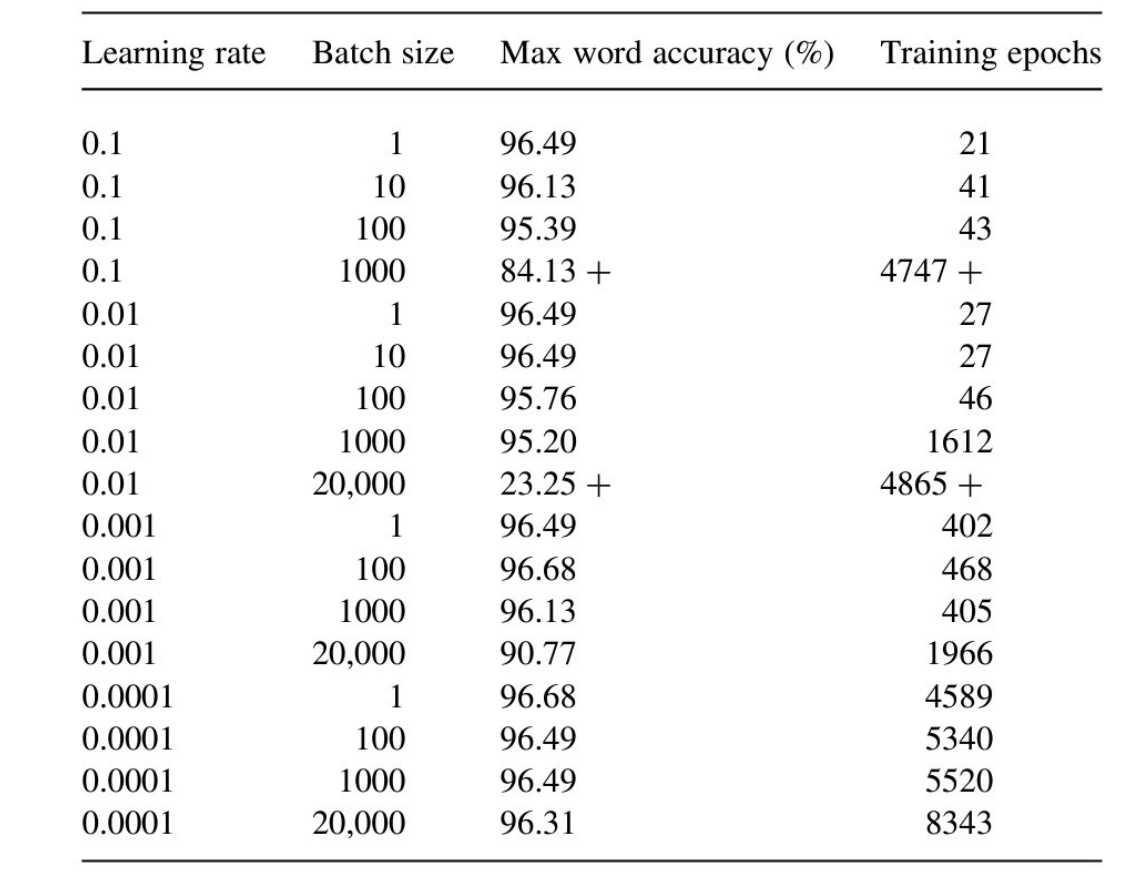
위 결과에 따라 batch size를 32로 조정함. 

결과 : 성능 다소 향상

In [122]:
model = revised_Net()
optimizer = optim.Adam(model.parameters(), lr = 0.01)
batch_size = 32

def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = Variable(data), Variable(target)
    optimizer.zero_grad()
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 10 == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
          epoch, batch_idx * len(data), len(train_loader.dataset),
          100. * batch_idx / len(train_loader), loss.item()))
      
def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        test_loss += F.nll_loss(output, target, size_average=False).data # nll_loss?? / cross entropy loss와의 관계 확인!
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [123]:
for epoch in range(2):
    train(epoch)
    test()

C:\Users\candy\AppData\Local\Temp/ipykernel_5336/3869219710.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 0 [0/50000 (0%)]	Loss: 2.306891
Train Epoch: 0 [640/50000 (1%)]	Loss: 2.066247
Train Epoch: 0 [1280/50000 (3%)]	Loss: 1.971895
Train Epoch: 0 [1920/50000 (4%)]	Loss: 2.045300
Train Epoch: 0 [2560/50000 (5%)]	Loss: 1.965380
Train Epoch: 0 [3200/50000 (6%)]	Loss: 2.025159
Train Epoch: 0 [3840/50000 (8%)]	Loss: 1.864788
Train Epoch: 0 [4480/50000 (9%)]	Loss: 1.919637
Train Epoch: 0 [5120/50000 (10%)]	Loss: 1.982582
Train Epoch: 0 [5760/50000 (12%)]	Loss: 1.897449
Train Epoch: 0 [6400/50000 (13%)]	Loss: 1.675573
Train Epoch: 0 [7040/50000 (14%)]	Loss: 1.670516
Train Epoch: 0 [7680/50000 (15%)]	Loss: 1.738528
Train Epoch: 0 [8320/50000 (17%)]	Loss: 1.942997
Train Epoch: 0 [8960/50000 (18%)]	Loss: 1.643697
Train Epoch: 0 [9600/50000 (19%)]	Loss: 1.805872
Train Epoch: 0 [10240/50000 (20%)]	Loss: 1.805515
Train Epoch: 0 [10880/50000 (22%)]	Loss: 1.733467
Train Epoch: 0 [11520/50000 (23%)]	Loss: 1.948311
Train Epoch: 0 [12160/50000 (24%)]	Loss: 1.767560
Train Epoch: 0 [12800/50000 

C:\Users\candy\AppData\Local\Temp/ipykernel_5336/4246283014.py:24: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)



Test set: Average loss: 1.5572, Accuracy: 4323/10000 (43%)

Train Epoch: 1 [0/50000 (0%)]	Loss: 1.615685
Train Epoch: 1 [640/50000 (1%)]	Loss: 1.831222
Train Epoch: 1 [1280/50000 (3%)]	Loss: 1.640702
Train Epoch: 1 [1920/50000 (4%)]	Loss: 1.621696
Train Epoch: 1 [2560/50000 (5%)]	Loss: 1.661404
Train Epoch: 1 [3200/50000 (6%)]	Loss: 1.855915
Train Epoch: 1 [3840/50000 (8%)]	Loss: 1.484867
Train Epoch: 1 [4480/50000 (9%)]	Loss: 1.519108
Train Epoch: 1 [5120/50000 (10%)]	Loss: 1.685642
Train Epoch: 1 [5760/50000 (12%)]	Loss: 1.614291
Train Epoch: 1 [6400/50000 (13%)]	Loss: 1.659317
Train Epoch: 1 [7040/50000 (14%)]	Loss: 1.919468
Train Epoch: 1 [7680/50000 (15%)]	Loss: 1.590032
Train Epoch: 1 [8320/50000 (17%)]	Loss: 1.705977
Train Epoch: 1 [8960/50000 (18%)]	Loss: 1.742130
Train Epoch: 1 [9600/50000 (19%)]	Loss: 1.708678
Train Epoch: 1 [10240/50000 (20%)]	Loss: 1.281553
Train Epoch: 1 [10880/50000 (22%)]	Loss: 1.393977
Train Epoch: 1 [11520/50000 (23%)]	Loss: 1.641831
Train Epoch: 1 [1

In [178]:
for epoch in range(4)
    train(epoch)
    test()

C:\Users\candy\AppData\Local\Temp/ipykernel_5336/4271830384.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 0 [0/50000 (0%)]	Loss: 2.306643
Train Epoch: 0 [640/50000 (1%)]	Loss: 2.316363
Train Epoch: 0 [1280/50000 (3%)]	Loss: 2.157161
Train Epoch: 0 [1920/50000 (4%)]	Loss: 2.206174
Train Epoch: 0 [2560/50000 (5%)]	Loss: 2.157812
Train Epoch: 0 [3200/50000 (6%)]	Loss: 1.960490
Train Epoch: 0 [3840/50000 (8%)]	Loss: 1.991516
Train Epoch: 0 [4480/50000 (9%)]	Loss: 2.102847
Train Epoch: 0 [5120/50000 (10%)]	Loss: 2.101171
Train Epoch: 0 [5760/50000 (12%)]	Loss: 1.970605
Train Epoch: 0 [6400/50000 (13%)]	Loss: 1.885306
Train Epoch: 0 [7040/50000 (14%)]	Loss: 2.000076
Train Epoch: 0 [7680/50000 (15%)]	Loss: 2.017972
Train Epoch: 0 [8320/50000 (17%)]	Loss: 2.003946
Train Epoch: 0 [8960/50000 (18%)]	Loss: 1.948273
Train Epoch: 0 [9600/50000 (19%)]	Loss: 1.904769
Train Epoch: 0 [10240/50000 (20%)]	Loss: 1.928657
Train Epoch: 0 [10880/50000 (22%)]	Loss: 1.807049
Train Epoch: 0 [11520/50000 (23%)]	Loss: 1.952831
Train Epoch: 0 [12160/50000 (24%)]	Loss: 1.895304
Train Epoch: 0 [12800/50000 

C:\Users\candy\AppData\Local\Temp/ipykernel_5336/4246283014.py:24: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)



Test set: Average loss: 1.6418, Accuracy: 4015/10000 (40%)

Train Epoch: 1 [0/50000 (0%)]	Loss: 1.386858
Train Epoch: 1 [640/50000 (1%)]	Loss: 1.785846
Train Epoch: 1 [1280/50000 (3%)]	Loss: 1.751823
Train Epoch: 1 [1920/50000 (4%)]	Loss: 1.613993
Train Epoch: 1 [2560/50000 (5%)]	Loss: 1.780463
Train Epoch: 1 [3200/50000 (6%)]	Loss: 1.620622
Train Epoch: 1 [3840/50000 (8%)]	Loss: 1.634337
Train Epoch: 1 [4480/50000 (9%)]	Loss: 1.628549
Train Epoch: 1 [5120/50000 (10%)]	Loss: 1.698940
Train Epoch: 1 [5760/50000 (12%)]	Loss: 1.635725
Train Epoch: 1 [6400/50000 (13%)]	Loss: 1.564115
Train Epoch: 1 [7040/50000 (14%)]	Loss: 1.672953
Train Epoch: 1 [7680/50000 (15%)]	Loss: 1.549954
Train Epoch: 1 [8320/50000 (17%)]	Loss: 1.590265
Train Epoch: 1 [8960/50000 (18%)]	Loss: 1.538034
Train Epoch: 1 [9600/50000 (19%)]	Loss: 1.639031
Train Epoch: 1 [10240/50000 (20%)]	Loss: 1.737942
Train Epoch: 1 [10880/50000 (22%)]	Loss: 1.627616
Train Epoch: 1 [11520/50000 (23%)]	Loss: 1.627043
Train Epoch: 1 [1

### 8차 시도 : batch size 더 줄이기 : 32->16 : 
학습률 0.01에 32가 가장 성능이 좋다는 사실을 파악함.

In [135]:
model = revised_Net()
optimizer = optim.Adam(model.parameters(), lr = 0.01)
batch_size = 32

def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = Variable(data), Variable(target)
    optimizer.zero_grad()
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 10 == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
          epoch, batch_idx * len(data), len(train_loader.dataset),
          100. * batch_idx / len(train_loader), loss.item()))
      
def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        test_loss += F.nll_loss(output, target, size_average=False).data # nll_loss?? / cross entropy loss와의 관계 확인!
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [136]:
for epoch in range(2):
    train(epoch)
    test()

C:\Users\candy\AppData\Local\Temp/ipykernel_5336/3869219710.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 0 [0/50000 (0%)]	Loss: 2.309719
Train Epoch: 0 [640/50000 (1%)]	Loss: 2.153600
Train Epoch: 0 [1280/50000 (3%)]	Loss: 2.093047
Train Epoch: 0 [1920/50000 (4%)]	Loss: 2.047919
Train Epoch: 0 [2560/50000 (5%)]	Loss: 1.765328
Train Epoch: 0 [3200/50000 (6%)]	Loss: 1.951118
Train Epoch: 0 [3840/50000 (8%)]	Loss: 1.991986
Train Epoch: 0 [4480/50000 (9%)]	Loss: 1.854161
Train Epoch: 0 [5120/50000 (10%)]	Loss: 1.872069
Train Epoch: 0 [5760/50000 (12%)]	Loss: 1.804993
Train Epoch: 0 [6400/50000 (13%)]	Loss: 1.706958
Train Epoch: 0 [7040/50000 (14%)]	Loss: 1.755105
Train Epoch: 0 [7680/50000 (15%)]	Loss: 1.801944
Train Epoch: 0 [8320/50000 (17%)]	Loss: 1.685918
Train Epoch: 0 [8960/50000 (18%)]	Loss: 1.702166
Train Epoch: 0 [9600/50000 (19%)]	Loss: 1.593942
Train Epoch: 0 [10240/50000 (20%)]	Loss: 1.816580
Train Epoch: 0 [10880/50000 (22%)]	Loss: 1.880807
Train Epoch: 0 [11520/50000 (23%)]	Loss: 1.609872
Train Epoch: 0 [12160/50000 (24%)]	Loss: 1.820199
Train Epoch: 0 [12800/50000 

C:\Users\candy\AppData\Local\Temp/ipykernel_5336/4246283014.py:24: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)



Test set: Average loss: 1.5539, Accuracy: 4271/10000 (43%)

Train Epoch: 1 [0/50000 (0%)]	Loss: 1.408850
Train Epoch: 1 [640/50000 (1%)]	Loss: 1.651092
Train Epoch: 1 [1280/50000 (3%)]	Loss: 1.558881
Train Epoch: 1 [1920/50000 (4%)]	Loss: 1.668144
Train Epoch: 1 [2560/50000 (5%)]	Loss: 1.749680
Train Epoch: 1 [3200/50000 (6%)]	Loss: 1.495252
Train Epoch: 1 [3840/50000 (8%)]	Loss: 1.549242
Train Epoch: 1 [4480/50000 (9%)]	Loss: 1.553962
Train Epoch: 1 [5120/50000 (10%)]	Loss: 1.619896
Train Epoch: 1 [5760/50000 (12%)]	Loss: 1.642467
Train Epoch: 1 [6400/50000 (13%)]	Loss: 1.651835
Train Epoch: 1 [7040/50000 (14%)]	Loss: 1.661792
Train Epoch: 1 [7680/50000 (15%)]	Loss: 1.597732
Train Epoch: 1 [8320/50000 (17%)]	Loss: 1.566020
Train Epoch: 1 [8960/50000 (18%)]	Loss: 1.741247
Train Epoch: 1 [9600/50000 (19%)]	Loss: 1.509252
Train Epoch: 1 [10240/50000 (20%)]	Loss: 1.491571
Train Epoch: 1 [10880/50000 (22%)]	Loss: 1.509655
Train Epoch: 1 [11520/50000 (23%)]	Loss: 1.480681
Train Epoch: 1 [1

### 9차 시도 : 7차 시도에서 fc layer 1개 더 추가
https://deep-learning-study.tistory.com/333
위의 코드를 참고하여 fc layer를 하나 더 추가함.
성능이 오히려 감소함 

전체적으로 hidden layer을 줄여보기로 결정

In [143]:
batch_size = 32
class revised_Net(nn.Module):
  def __init__(self):
    super(revised_Net, self).__init__()
    self.conv1 = nn.Conv2d(3,6, kernel_size = 3)
    self.conv2 = nn.Conv2d(6,16,kernel_size = 3)
    self.conv3 = nn.Conv2d(16,32, kernel_size = 3)
    self.mp = nn.MaxPool2d(2)
    self.fc1 = nn.Linear(1152 , 128)
    self.fc2 = nn.Linear(128 , 64)
    self.fc3 = nn.Linear(64 , 10)

  def forward(self, x):
    in_size = x.size(0)
    x = F.relu(self.mp(self.conv1(x)))
    x = F.relu(self.mp(self.conv2(x)))
    x = F.relu(self.mp(self.conv3(x)))
    x = x.view(in_size, -1)
    x = self.fc1(x)
    x = self.fc2(x)
    x = self.fc3(x)
    return F.log_softmax(x)

In [144]:
model = revised_Net()
optimizer = optim.Adam(model.parameters(), lr = 0.01)
batch_size = 32

def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = Variable(data), Variable(target)
    optimizer.zero_grad()
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 10 == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
          epoch, batch_idx * len(data), len(train_loader.dataset),
          100. * batch_idx / len(train_loader), loss.item()))
      
def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        test_loss += F.nll_loss(output, target, size_average=False).data # nll_loss?? / cross entropy loss와의 관계 확인!
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [145]:
for epoch in range(2):
    train(epoch)
    test()

C:\Users\candy\AppData\Local\Temp/ipykernel_5336/4167910446.py:22: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 0 [0/50000 (0%)]	Loss: 2.314869
Train Epoch: 0 [640/50000 (1%)]	Loss: 2.302298
Train Epoch: 0 [1280/50000 (3%)]	Loss: 2.246794
Train Epoch: 0 [1920/50000 (4%)]	Loss: 2.262169
Train Epoch: 0 [2560/50000 (5%)]	Loss: 2.158435
Train Epoch: 0 [3200/50000 (6%)]	Loss: 1.988747
Train Epoch: 0 [3840/50000 (8%)]	Loss: 2.010231
Train Epoch: 0 [4480/50000 (9%)]	Loss: 2.041182
Train Epoch: 0 [5120/50000 (10%)]	Loss: 2.174647
Train Epoch: 0 [5760/50000 (12%)]	Loss: 2.067473
Train Epoch: 0 [6400/50000 (13%)]	Loss: 1.976602
Train Epoch: 0 [7040/50000 (14%)]	Loss: 1.996052
Train Epoch: 0 [7680/50000 (15%)]	Loss: 2.123665
Train Epoch: 0 [8320/50000 (17%)]	Loss: 1.728855
Train Epoch: 0 [8960/50000 (18%)]	Loss: 2.019114
Train Epoch: 0 [9600/50000 (19%)]	Loss: 2.141571
Train Epoch: 0 [10240/50000 (20%)]	Loss: 1.954843
Train Epoch: 0 [10880/50000 (22%)]	Loss: 1.832045
Train Epoch: 0 [11520/50000 (23%)]	Loss: 1.824184
Train Epoch: 0 [12160/50000 (24%)]	Loss: 1.905480
Train Epoch: 0 [12800/50000 

C:\Users\candy\AppData\Local\Temp/ipykernel_5336/4246283014.py:24: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)



Test set: Average loss: 1.7116, Accuracy: 3595/10000 (36%)

Train Epoch: 1 [0/50000 (0%)]	Loss: 1.740184
Train Epoch: 1 [640/50000 (1%)]	Loss: 1.921839
Train Epoch: 1 [1280/50000 (3%)]	Loss: 1.975057
Train Epoch: 1 [1920/50000 (4%)]	Loss: 1.855593
Train Epoch: 1 [2560/50000 (5%)]	Loss: 1.655235
Train Epoch: 1 [3200/50000 (6%)]	Loss: 1.935381
Train Epoch: 1 [3840/50000 (8%)]	Loss: 1.574112
Train Epoch: 1 [4480/50000 (9%)]	Loss: 1.552142
Train Epoch: 1 [5120/50000 (10%)]	Loss: 1.692512
Train Epoch: 1 [5760/50000 (12%)]	Loss: 1.808558
Train Epoch: 1 [6400/50000 (13%)]	Loss: 1.831339
Train Epoch: 1 [7040/50000 (14%)]	Loss: 1.544310
Train Epoch: 1 [7680/50000 (15%)]	Loss: 1.801208
Train Epoch: 1 [8320/50000 (17%)]	Loss: 1.864119
Train Epoch: 1 [8960/50000 (18%)]	Loss: 1.668755
Train Epoch: 1 [9600/50000 (19%)]	Loss: 1.648014
Train Epoch: 1 [10240/50000 (20%)]	Loss: 1.739854
Train Epoch: 1 [10880/50000 (22%)]	Loss: 1.772981
Train Epoch: 1 [11520/50000 (23%)]	Loss: 1.658039
Train Epoch: 1 [1

### 10차 시도 : conv layer 1개 줄임, epoch 수 늘림 2->3

In [176]:
batch_size = 32
class revised_Net(nn.Module):
  def __init__(self):
    super(revised_Net, self).__init__()
    self.conv1 = nn.Conv2d(3,6, kernel_size = 3)
    self.conv2 = nn.Conv2d(6,16,kernel_size = 3)
    self.mp = nn.MaxPool2d(2,2)
    self.fc1 = nn.Linear(3136 , 84)
    self.fc2 = nn.Linear(84 , 10)

  def forward(self, x):
    in_size = x.size(0)
    x = F.relu(self.mp(self.conv1(x)))
    x = F.relu(self.mp(self.conv2(x)))
    x = x.view(in_size, -1)
    x = self.fc1(x)
    x = self.fc2(x)
    return F.log_softmax(x)

In [177]:
model = revised_Net()
optimizer = optim.Adam(model.parameters(), lr = 0.01)
batch_size = 32

def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = Variable(data), Variable(target)
    optimizer.zero_grad()
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 10 == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
          epoch, batch_idx * len(data), len(train_loader.dataset),
          100. * batch_idx / len(train_loader), loss.item()))
      
def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        test_loss += F.nll_loss(output, target, size_average=False).data # nll_loss?? / cross entropy loss와의 관계 확인!
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [175]:
for epoch in range(4):
    train(epoch)
    test()

C:\Users\candy\AppData\Local\Temp/ipykernel_5336/4271830384.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 0 [0/50000 (0%)]	Loss: 1.415479
Train Epoch: 0 [640/50000 (1%)]	Loss: 1.407545
Train Epoch: 0 [1280/50000 (3%)]	Loss: 1.578519
Train Epoch: 0 [1920/50000 (4%)]	Loss: 1.377856
Train Epoch: 0 [2560/50000 (5%)]	Loss: 1.593354
Train Epoch: 0 [3200/50000 (6%)]	Loss: 1.487607
Train Epoch: 0 [3840/50000 (8%)]	Loss: 1.734976
Train Epoch: 0 [4480/50000 (9%)]	Loss: 1.491468
Train Epoch: 0 [5120/50000 (10%)]	Loss: 1.386059
Train Epoch: 0 [5760/50000 (12%)]	Loss: 1.475778
Train Epoch: 0 [6400/50000 (13%)]	Loss: 1.630450
Train Epoch: 0 [7040/50000 (14%)]	Loss: 1.378057
Train Epoch: 0 [7680/50000 (15%)]	Loss: 1.625515
Train Epoch: 0 [8320/50000 (17%)]	Loss: 1.627645
Train Epoch: 0 [8960/50000 (18%)]	Loss: 1.693363
Train Epoch: 0 [9600/50000 (19%)]	Loss: 1.407258
Train Epoch: 0 [10240/50000 (20%)]	Loss: 1.231989
Train Epoch: 0 [10880/50000 (22%)]	Loss: 1.548326
Train Epoch: 0 [11520/50000 (23%)]	Loss: 1.468749
Train Epoch: 0 [12160/50000 (24%)]	Loss: 1.407758
Train Epoch: 0 [12800/50000 

C:\Users\candy\AppData\Local\Temp/ipykernel_5336/4246283014.py:24: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)



Test set: Average loss: 1.4868, Accuracy: 4717/10000 (47%)

Train Epoch: 1 [0/50000 (0%)]	Loss: 1.546063
Train Epoch: 1 [640/50000 (1%)]	Loss: 1.232846
Train Epoch: 1 [1280/50000 (3%)]	Loss: 1.438369
Train Epoch: 1 [1920/50000 (4%)]	Loss: 1.591016
Train Epoch: 1 [2560/50000 (5%)]	Loss: 1.412649
Train Epoch: 1 [3200/50000 (6%)]	Loss: 1.495334
Train Epoch: 1 [3840/50000 (8%)]	Loss: 1.624527
Train Epoch: 1 [4480/50000 (9%)]	Loss: 1.258913
Train Epoch: 1 [5120/50000 (10%)]	Loss: 1.574239
Train Epoch: 1 [5760/50000 (12%)]	Loss: 1.426445
Train Epoch: 1 [6400/50000 (13%)]	Loss: 1.409420
Train Epoch: 1 [7040/50000 (14%)]	Loss: 1.453846
Train Epoch: 1 [7680/50000 (15%)]	Loss: 1.508503
Train Epoch: 1 [8320/50000 (17%)]	Loss: 1.568879
Train Epoch: 1 [8960/50000 (18%)]	Loss: 1.456023
Train Epoch: 1 [9600/50000 (19%)]	Loss: 1.442423
Train Epoch: 1 [10240/50000 (20%)]	Loss: 1.547846
Train Epoch: 1 [10880/50000 (22%)]	Loss: 1.276723
Train Epoch: 1 [11520/50000 (23%)]	Loss: 1.456022
Train Epoch: 1 [1

## 참고
1. SGD 보다는 Adam이 성능이 좋다
2. 0.01 학습률에서 가장 성능이 좋은 batch size는 32
3. 돌려보니 VGGnet은 input 사이즈를 256 이상으로 조정해야 돌릴 수 있을 것 같다
4. 10차 시도에서 conv layer를 1개 줄이고 epoch수를 늘려도 7차 시도와 비슷한 결과를 보임 
-> 7차시도가 최고 성능 : 46%